<a href="https://colab.research.google.com/github/lakesidetech/machine_learning/blob/main/Copy_of_Employee_attrition_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Model for Predicting Employee Attrition
We are building a simple model using the ***employee_attrition_test.csv*** data set for predicting an employee attrition. This project is organized as follows: (a) data preprocessing and variable selection; (b) basic regression model; (c) hyper-parameters tuning; and (d) techniques for dimensionality reduction.

Author: Ruth A. Amolo & Nancy Wachira Date: 5/15/2021


# Import essential libraries

In [ ]:
#data processing
import pandas as pd

# linear algebra
import numpy as np

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas import read_csv

#Algorithms
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



**Read dataset and display columns¶**


In [ ]:
#hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
#hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')

hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')

In [ ]:
test_data = hr_attrition_test_df=pd.read_csv('/content/employee_attrition_test.csv')
train_data = hr_attrition_train_df=pd.read_csv('/content/employee_attrition_train.csv')



**A quick preview the first 10 Training Dataset**

In [74]:

train_data.head(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
5,33.0,Yes,Travel_Rarely,1277.0,Research & Development,15.0,1,Medical,1,582,2,Male,56,3,3,Manager,3,Married,13610,24619,7,Y,Yes,12,3,4,80,0,15,2,4,7,6,7,7
6,47.0,No,Travel_Rarely,1001.0,Research & Development,4.0,3,Life Sciences,1,1827,3,Female,92,2,3,Manufacturing Director,2,Divorced,10333,19271,8,Y,Yes,12,3,3,80,1,28,4,3,22,11,14,10
7,22.0,No,Travel_Rarely,1230.0,Research & Development,1.0,2,Life Sciences,1,872,4,Male,33,2,2,Manufacturing Director,4,Married,4775,19146,6,Y,No,22,4,1,80,2,4,2,1,2,2,2,2
8,NaN,Yes,Travel_Rarely,890.0,Research & Development,2.0,4,Medical,1,828,3,Male,46,3,1,Research Scientist,3,Single,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1
9,33.0,No,Non-Travel,530.0,Sales,16.0,3,Life Sciences,1,1681,3,Female,36,3,2,Sales Executive,4,Divorced,5368,16130,1,Y,Yes,25,4,3,80,1,7,2,3,6,5,1,2


In [75]:
train_data.shape #Total rows and columns in Training dataset


(1029, 35)

**We can see that there are 1029 rows and 35 columns in our training dataset.**

In [77]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [76]:
train_data.isnull().sum()


Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
#Let’s take a more detailed look at what data is actually missing:
total = df500_train_data.isnull().sum().sort_values(ascending=False)
percent_1 = df500_train_data.isnull().sum()/df500_train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Age,136,13.2
DistanceFromHome,95,9.2
DailyRate,27,2.6
BusinessTravel,5,0.5
MaritalStatus,5,0.5


There are 136 rows with missing Age, 27 rows with missing DailyRate, 5 rows with mssing BussinessTravel, 95 rows with missing DistanceFromHome, and 5 rows with missing MaritalStatus information.



In [78]:
train_data.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,893.0,37.930571,9.395978,18.0,31.00,37.0,44.0,60.0
DailyRate,1002.0,800.528942,408.109828,102.0,458.25,801.5,1162.0,1496.0
DistanceFromHome,934.0,9.930407,8.421791,1.0,2.00,8.0,16.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.00,3.0,4.0,5.0
EmployeeCount,1029.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.00,1019.0,1553.0,2068.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.00,3.0,4.0,4.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.00,67.0,84.0,100.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.00,3.0,3.0,4.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.00,2.0,3.0,5.0


*Looking into the testing dataset*

In [79]:
test_data.shape

(441, 34)

In [82]:
test_data.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,NaN,Travel_Rarely,866.0,Sales,NaN,3,Medical,1,1469,4,Male,84,3,2,Sales Executive,1,Single,8463,23490,0,Y,No,18,3,4,80,0,6,4,3,5,4,1,3
1,53.0,Travel_Rarely,1084.0,Research & Development,13.0,2,Medical,1,250,4,Female,57,4,2,Manufacturing Director,1,Divorced,4450,26250,1,Y,No,11,3,3,80,2,5,3,3,4,2,1,3
2,24.0,Travel_Rarely,240.0,Human Resources,22.0,1,Human Resources,1,1714,4,Male,58,1,1,Human Resources,3,Married,1555,11585,1,Y,No,11,3,3,80,1,1,2,3,1,0,0,0
3,45.0,Travel_Rarely,1339.0,Research & Development,7.0,3,Life Sciences,1,86,2,Male,59,3,3,Research Scientist,1,Divorced,9724,18787,2,Y,No,17,3,3,80,1,25,2,3,1,0,0,0
4,36.0,Travel_Rarely,1396.0,Research & Development,NaN,2,Life Sciences,1,304,4,Male,62,3,2,Laboratory Technician,2,Single,5914,9945,8,Y,No,16,3,4,80,0,16,3,4,13,11,3,7


In [83]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       386 non-null    float64
 1   BusinessTravel            436 non-null    object 
 2   DailyRate                 427 non-null    float64
 3   Department                441 non-null    object 
 4   DistanceFromHome          387 non-null    float64
 5   Education                 441 non-null    int64  
 6   EducationField            441 non-null    object 
 7   EmployeeCount             441 non-null    int64  
 8   EmployeeNumber            441 non-null    int64  
 9   EnvironmentSatisfaction   441 non-null    int64  
 10  Gender                    441 non-null    object 
 11  HourlyRate                441 non-null    int64  
 12  JobInvolvement            441 non-null    int64  
 13  JobLevel                  441 non-null    int64  
 14  JobRole   

In [84]:
# Percentage of missing test data
#Check for missing value in any column in test_data

total = test_data.isnull().sum().sort_values(ascending=False)
percent_1 = test_data.isnull().sum()/test_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


,Total,%
Age,55,12.5
DistanceFromHome,54,12.2
DailyRate,14,3.2
BusinessTravel,5,1.1
MaritalStatus,3,0.7


### Relationship between Features and Attrition

In [86]:
#In this section, we analyze relationship between different features with respect to Attrition. 
#We see how different feature values show different Attrition chance. 
#We also plot different kinds of diagrams to visualize our data and findings.

attrition = train_data[train_data['Attrition'] == 'Yes']
not_attrition = train_data[train_data['Attrition'] == 'n']

print ("Attrition: %i (%.1f%%)"%(len(attrition), float(len(attrition))/len(train_data)*100.0))

print ("Not Attrition: %i (%.1f%%)"%(len(not_attrition), float(len(not_attrition))/len(train_data)*100.0))
print ("Total: %i"%len(train_data))


Attrition: 0 (0.0%)
Not Attrition: 0 (0.0%)
Total: 1029


**Gender vs. Attrition**

In [87]:
train_data.Gender.value_counts()
train_data.groupby('Gender').Attrition.value_counts()


Gender  Attrition
Female  No           349
        Yes           63
Male    No           504
        Yes          113
Name: Attrition, dtype: int64

In [89]:
#sns.barplot(x='Gender', y='Attrition', data=train_data)


**The number of males in employement is higher than that of females. However, more males have a high number of attrition**

In [72]:
#subset the orignal dataset
#its safer to work on copies than original dataframes unless you won't be needing the original df


In [73]:
#subset the orignal dataset
#its safer to work on copies than original dataframes unless you won't be needing the original df


# Explotaroty Data Analysis



1.found out the shape of the data - how rows and columns do we have
2.   List item



In [ ]:
#@title Default title text
#Handling Missing Value
hr_attrition_train_df.isnull().sum()

In [ ]:
#Let’s take a more detailed look at what data is actually missing:
total = hr_attrition_train_df.isnull().sum().sort_values(ascending=False)
percent_1 = hr_attrition_train_df.isnull().sum()/hr_attrition_train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)


In [ ]:
import missingno as msno
msno.bar(hr_attrition_train_df)


In [ ]:
hr_attrition_train_df


***Training set has 1029 examples and 34 features + te target variable (attrition) 3 of the features are floats, 23 are integer and 9 are objects***

The **BusinessTravel** and **MaritalStatus** has 5 features missing values, which can easily be filled. It will be much more tricky, to deal with the **‘Age’** feature, which has 136 missing values. The **DistanceFromHome** feature needs further investigation it is missing 95, and **DailyRate** feature is missing 27.


Describing data

In [ ]:
hr_attrition_train_df.describe()


In [ ]:
#display both categorical and numerical columns
Categorical_columns=['Attrition','BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','Over18','OverTime']
Numerical_columns=['Age','DailyRate','DistanceFromHome','Education','EmployeeCount','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
print('Categorical_columns  +++++',Categorical_columns)
print('Numerical_columns +++++++++',Numerical_columns)
#hr_attrition_train_df.columns.to_list()


*We* can calculate categorical means for other categorical variables such as EducationField and marital status to get a more detailed sense of our data.


In [ ]:
hr_attrition_train_df.groupby('EducationField').mean()

In [ ]:
hr_attrition_train_df.groupby('Attrition').mean()

In [ ]:
hr_attrition_train_df.groupby('MaritalStatus').mean()

In [ ]:
hr_attrition_train_df.groupby('BusinessTravel').mean()

In [ ]:
hr_attrition_train_df.groupby('Department').mean()

In [ ]:
hr_attrition_train_df.groupby('OverTime').mean()

In [ ]:
hr_attrition_train_df.groupby('JobRole').mean()

In [ ]:
hr_attrition_train_df.groupby('Over18').mean()

In [ ]:
hr_attrition_train_df.groupby('Gender').mean()

# VISUALIZE DATA

In [ ]:
#visualize the data for you to get the first impression of the data


In [ ]:
sns.set(font_scale=1.4)
hr_attrition_train_df['Age'].plot(kind='hist', figsize=(10, 10));
plt.xlabel("Attrition by Age", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.title("Distribution of Attrition by age", y=1.015, fontsize=22);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

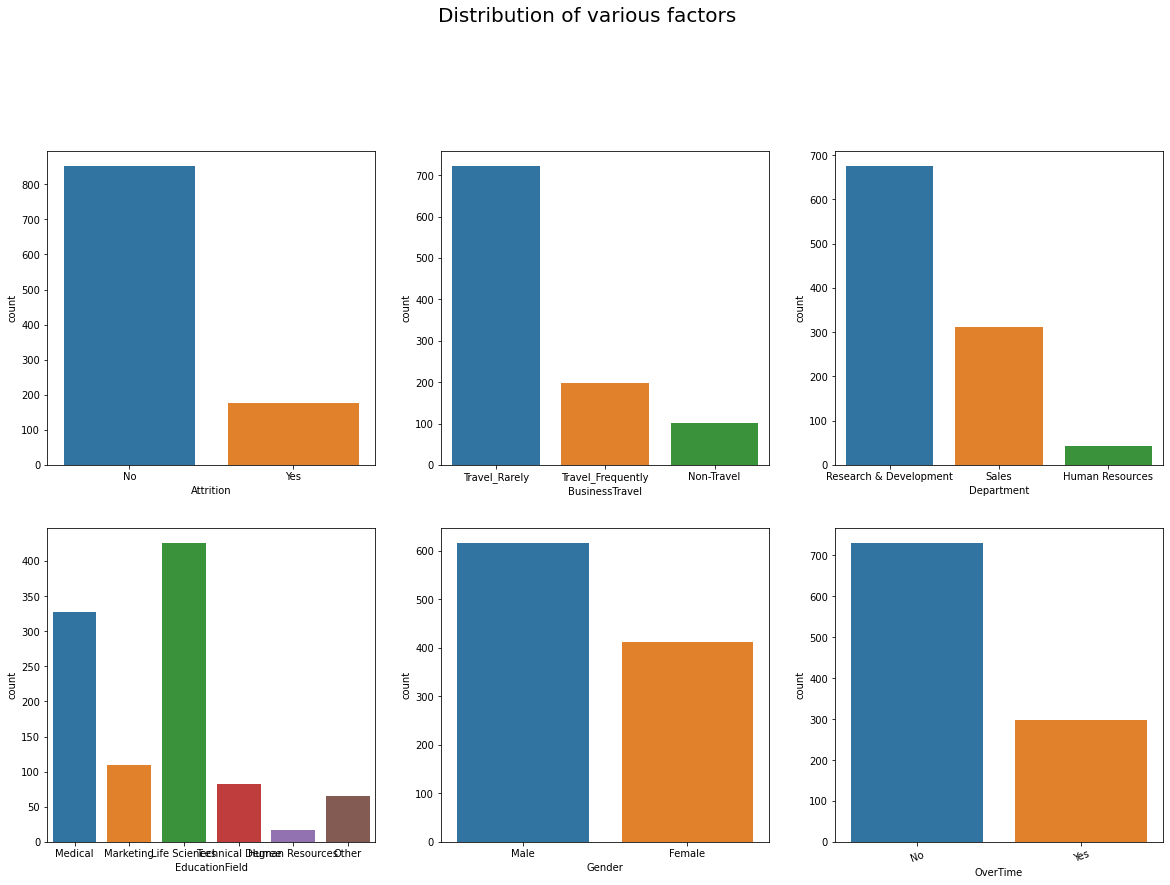

In [106]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(train_data['Attrition'], ax = ax[0,0]) 
sns.countplot(train_data['BusinessTravel'], ax = ax[0,1]) 
sns.countplot(train_data['Department'], ax = ax[0,2]) 
sns.countplot(train_data['EducationField'], ax = ax[1,0])
sns.countplot(train_data['Gender'], ax = ax[1,1])  
sns.countplot(train_data['OverTime'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

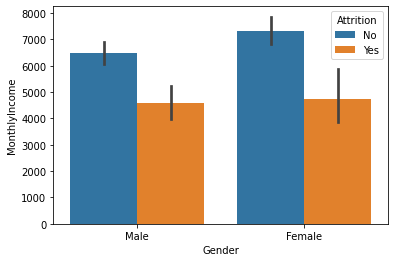

In [101]:
#Data Visualization
#draw a bar plot of Attrition by Gender
sns.barplot(x="Gender", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)



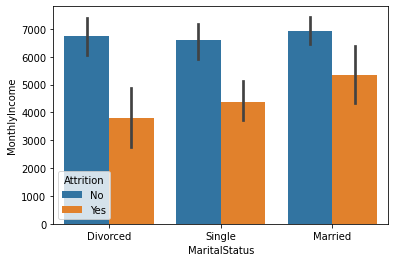

In [107]:
#draw a bar plot of Attrition by Gender
sns.barplot(x="MaritalStatus", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)


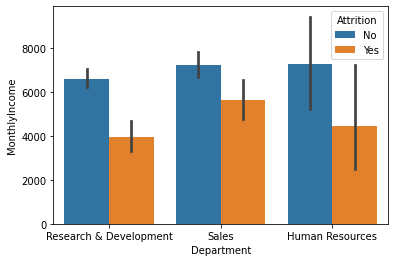

In [109]:
#draw a bar plot of Attrition by Gender
sns.barplot(x="Department", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)


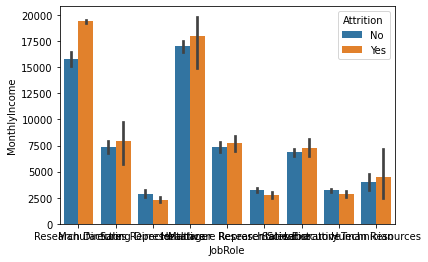

In [110]:
#jobRole
#draw a bar plot of Attrition by Gender
sns.barplot(x="JobRole", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)


#more employees from the sales department are more likely leave the company

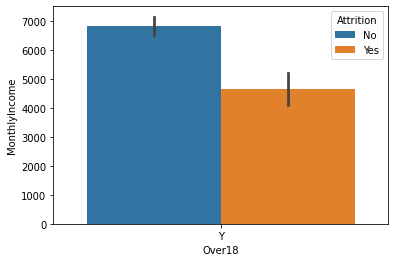

In [108]:
#draw a bar plot of Attrition by Gender
sns.barplot(x="Over18", y="MonthlyIncome", hue="Attrition",data=hr_attrition_train_df)


'''Plots above convey following things about the dataset:
Attrition status: About employees who leave through attrition.
Gender: There are more Men than Women who are employed,at the same time more men than women leave through attrition(approx.)
Martial Status: Married people are more likely to be leave employement through attrition. Over18: Majority of the population over18 are employed are also likely to stay on the job.)'''

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2342     3
2451     3
2610     3
2404     3
6347     3
        ..
5347     1
5343     1
19033    1
3291     1
14336    1
Name: MonthlyIncome, Length: 963, dtype: int64

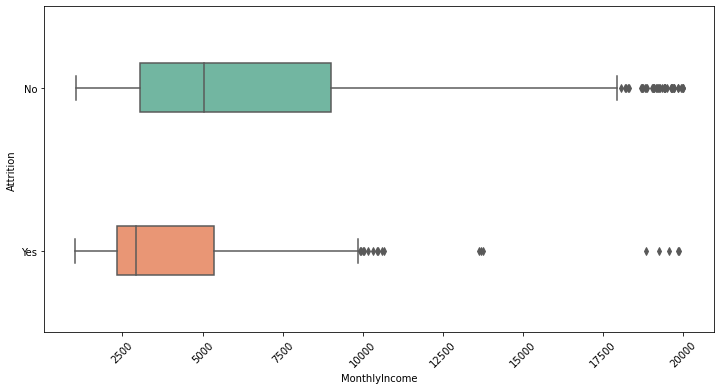

In [90]:
plt.figure(figsize=(12,6))
sns.boxplot('MonthlyIncome', 'Attrition', data=hr_attrition_train_df, width=0.3, palette="Set2")
plt.xticks(rotation=45)
hr_attrition_train_df['MonthlyIncome'].value_counts()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


2342     3
2451     3
2610     3
2404     3
6347     3
        ..
5347     1
5343     1
19033    1
3291     1
14336    1
Name: MonthlyIncome, Length: 963, dtype: int64

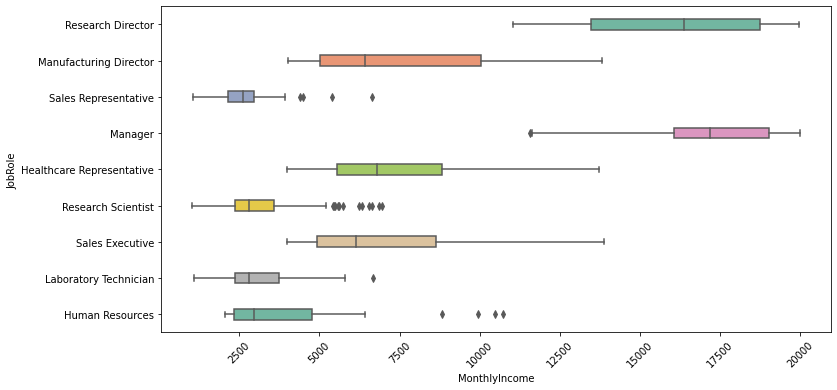

In [92]:
plt.figure(figsize=(12,6))
sns.boxplot('MonthlyIncome', 'JobRole', data=hr_attrition_train_df, width=0.3, palette="Set2")
plt.xticks(rotation=45)
hr_attrition_train_df['MonthlyIncome'].value_counts()


In [ ]:
import matplotlib.image as mpimg
JG1 = sns.jointplot('Education', 'MonthlyIncome', data=hr_attrition_train_df, kind='scatter', color='g')
JG2 = sns.jointplot('JobLevel', 'MonthlyIncome', data=hr_attrition_train_df, kind='hex', color='b')
JG3 = sns.jointplot('HourlyRate', 'MonthlyIncome', data=hr_attrition_train_df, kind='scatter', color='r')
JG4 = sns.jointplot('JobSatisfaction', 'MonthlyIncome', data=hr_attrition_train_df, kind='hex', color='orange')
JG1.savefig('JG1.png')
plt.close(JG1.fig)
JG2.savefig('JG2.png')
plt.close(JG2.fig)
JG3.savefig('JG3.png')
plt.close(JG3.fig)
JG4.savefig('JG4.png')
plt.close(JG4.fig)
f, ax = plt.subplots(2,2,figsize=(20,16))
ax[0,0].imshow(mpimg.imread('JG1.png'))
ax[0,1].imshow(mpimg.imread('JG2.png'))
ax[1,0].imshow(mpimg.imread('JG3.png'))
ax[1,1].imshow(mpimg.imread('JG4.png'))
[ax.set_axis_off() for ax in ax.ravel()]
plt.tight_layout()


In [ ]:
hr_attrition_train_df.boxplot(by ='Attrition', column =['DailyRate'], grid = False)


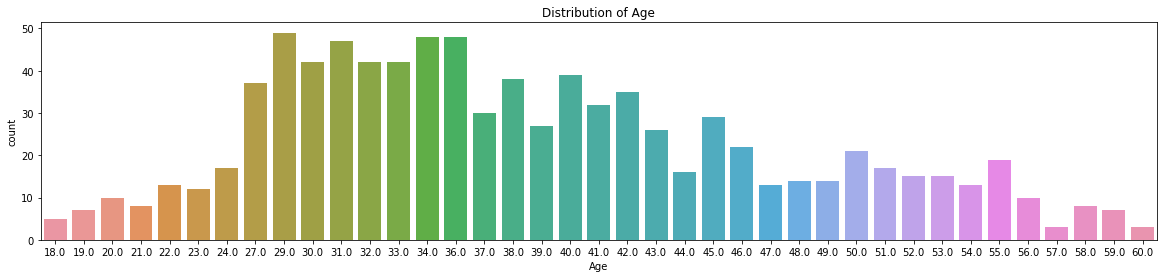

In [99]:
# See the distribution of gender to recognize different distributions
plt.subplots(figsize=(20,4))
sns.countplot(x='Age', data=hr_attrition_train_df);
plt.title('Distribution of Age');


#What Features Are Linked To Employee Attrition?


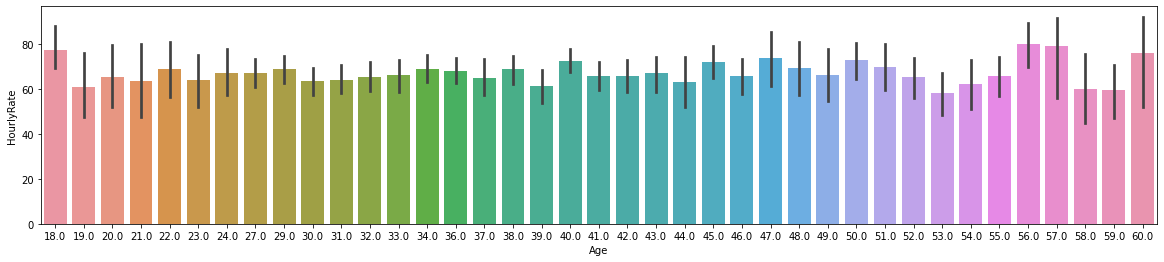

In [98]:
plt.subplots(figsize=(20,4))
sns.barplot(data=hr_attrition_train_df, x="Age", y="HourlyRate")


In [ ]:
hr_attrition_train_df['Attrition'].value_counts()

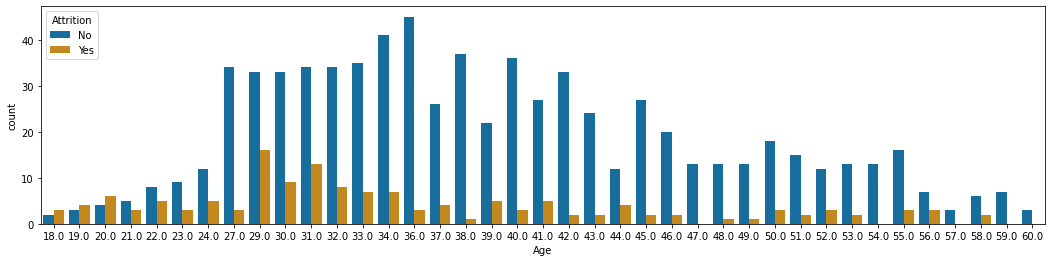

In [95]:
#visualize number of number of employees who have left the company
plt.subplots(figsize=(18,4))
sns.countplot(x="Age", hue="Attrition",data=hr_attrition_train_df,palette='colorblind')


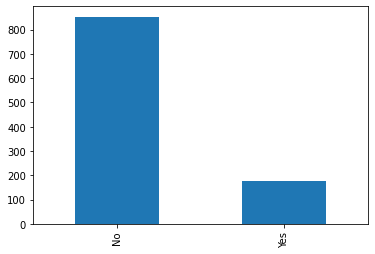

In [96]:
#visualizing categorical variables
hr_attrition_train_df['Attrition'].value_counts().plot.bar()


*We access the Age column, call the plot method and pass in hist to the kind argument to output a histogram plot.*


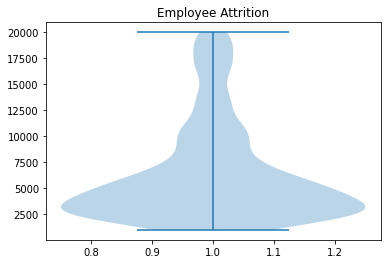

In [97]:
# boxplot
plt.title('Employee Attrition')
plt.violinplot(hr_attrition_train_df['MonthlyIncome'])
plt.show()

shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared

In [ ]:
sns.countplot(hr_attrition_train_df['Attrition'])

# DATA CLEANING

In [ ]:
df500_test_data=test_data.copy()
df500_test_data



In [ ]:
df500_train_data=train_data.copy()

df500_train_data

In [ ]:

from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['Gender']=number.fit_transform(df500_train_data['Gender'].astype('str')) 
df500_test_data['Gender']=number.fit_transform(df500_test_data['Gender'].astype('str')) 
df500_test_data




In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['EducationField']=number.fit_transform(df500_train_data['EducationField'].astype('str')) 
df500_test_data['EducationField']=number.fit_transform(df500_test_data['EducationField'].astype('str')) 
df500_test_data


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['Department']=number.fit_transform(df500_train_data['Department'].astype('str')) 
df500_test_data['Department']=number.fit_transform(df500_test_data['Department'].astype('str')) 
df500_test_data


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['BusinessTravel']=number.fit_transform(df500_train_data['BusinessTravel'].astype('str')) 
df500_test_data['BusinessTravel']=number.fit_transform(df500_test_data['BusinessTravel'].astype('str')) 
df500_test_data


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['JobRole']=number.fit_transform(df500_train_data['JobRole'].astype('str')) 
df500_test_data['JobRole']=number.fit_transform(df500_test_data['JobRole'].astype('str')) 
df500_test_data


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['OverTime']=number.fit_transform(df500_train_data['OverTime'].astype('str')) 
df500_test_data['OverTime']=number.fit_transform(df500_test_data['OverTime'].astype('str')) 
df500_test_data


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['Over18']=number.fit_transform(df500_train_data['Over18'].astype('str')) 
df500_test_data['Over18']=number.fit_transform(df500_test_data['Over18'].astype('str')) 
df500_test_data


In [ ]:
from sklearn.preprocessing import LabelEncoder
number=LabelEncoder()
df500_train_data['MaritalStatus']=number.fit_transform(df500_train_data['MaritalStatus'].astype('str')) 
df500_test_data['MaritalStatus']=number.fit_transform(df500_test_data['MaritalStatus'].astype('str')) 
df500_test_data


In [46]:
#impute missing data
#imputation with median
missing_rate = ['MaritalStatus']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()

#imputation with median
missing_rate = ['MaritalStatus']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()



count of NULL values after imputation

count of NULL values after imputation



Age                         136
Attrition                     0
BusinessTravel                0
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
#imputation with median
missing_rate = ['DailyRate']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()

#imputation with median
missing_rate = ['DailyRate']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


In [48]:
#imputation with median
missing_rate = ['Age']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()


#imputation with median
missing_rate = ['Age']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


count of NULL values after imputation

count of NULL values after imputation



Age                          0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome            95
Education                    0
EducationField               0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender                       0
HourlyRate                   0
JobInvolvement               0
JobLevel                     0
JobRole                      0
JobSatisfaction              0
MaritalStatus                0
MonthlyIncome                0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInC

In [49]:
#imputation with median
missing_rate = ['DistanceFromHome']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()

#imputation with median
missing_rate = ['DistanceFromHome']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()


count of NULL values after imputation

count of NULL values after imputation



Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [50]:
#imputation with median
missing_rate = ['BusinessTravel']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_train_data.loc[df500_train_data.loc[:,i].isnull(),i]=df500_train_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_train_data.isnull().sum()

#imputation with median
missing_rate = ['BusinessTravel']
 
#Technique 2: Using median to impute the missing values
for i in missing_rate:
 df500_test_data.loc[df500_test_data.loc[:,i].isnull(),i]=df500_test_data.loc[:,i].median()
 
print("count of NULL values after imputation\n")
df500_test_data.isnull().sum()


count of NULL values after imputation

count of NULL values after imputation



Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithC

# Predictive Modeling




**Define Training and Testing set**


In [63]:
##First, we train these classifiers with our training data.
##After that, using the trained classifier, we predict the attrition outcome of test data.
##Finally, we calculate the accuracy score (in percentange) of the trained classifier.



In [60]:
X_train = df500_train_data.drop('Attrition', axis=1)
y_train = df500_train_data['Attrition']
X_test =df500_test_data.copy()
X_train.shape, y_train.shape, X_test.shape


((1029, 34), (1029,), (441, 34))

In [61]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)


print (acc_svc)




82.9


In [62]:

from sklearn.linear_model import LogisticRegression
#LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_log_reg = clf.predict(X_test)
acc_log_reg = round( clf.score(X_train, y_train) * 100, 2)

print (str(acc_log_reg) + ' percent')


82.99 percent


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
#K-Nearest Neighbors 
clf = KNeighborsClassifier(n_neighbors = 5)
clf.fit(X_train, y_train)
y_pred_knn = clf.predict(X_test)
acc_knn = round(clf.score(X_train, y_train) * 100, 2)


print (acc_knn)


85.52


In [64]:
#Linear SVM
clf = LinearSVC()
clf.fit(X_train, y_train)
y_pred_linear_svc = clf.predict(X_test)
acc_linear_svc = round(clf.score(X_train, y_train) * 100, 2)


print (acc_linear_svc)


24.2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [68]:
#Decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred_decision_tree = clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)


print (acc_decision_tree)


100.0


In [69]:
#random forest
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred_random_forest = clf.predict(X_test)
acc_random_forest = round(clf.score(X_train, y_train) * 100, 2)


print (acc_random_forest)


100.0


In [70]:
#Perceptron
clf = Perceptron(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_perceptron = clf.predict(X_test)
acc_perceptron = round(clf.score(X_train, y_train) * 100, 2)


print (acc_perceptron)


66.76


In [71]:
#Stochastic Gradient Descent (SGD)
clf = SGDClassifier(max_iter=5, tol=None)
clf.fit(X_train, y_train)
y_pred_sgd = clf.predict(X_test)
acc_sgd = round(clf.score(X_train, y_train) * 100, 2)

print (acc_sgd)


82.7


In [ ]:
#Confusion Matrix


#In our attrition problem case

> Indented block



In [94]:
#7: Create a confusion matrix with a Pandas cross table - confusion matrix

from sklearn.metrics import confusion_matrix
tree_clf = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
tree_clf.fit(X_train,y_train)
y_pred = tree_clf.predict(X_test_imp)
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix on Test Data")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
#8: Print the TN, FN, TP, FP values
# 9: Print the model precision value
# precision is the ratio of  tp / (tp + fp)
#10: # recall = the ratio tp / (tp + fn)
#11: Visualize the confusion matrix with a Heatmap


NameError: ignored

Predictive model evaluation
results and discussions
Conclusion

In [ ]:
sns.pairplot(df3.iloc[:,[1,29,30,31]], hue='Attrition', size=3.5);